Principle Component Analysis

In this project we work on a Covid-19 dataset that reports the number of confirmed cases per day and Fashion MNIST.

# Part 1: Getting started [2 Marks]

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS_COVID_Jan22.csv',
    index_col=0,
    thousands=','
)

1. Write a function to do the following: **[0.5]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.5]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.5]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.5]**
The trends in standardized data means how the cases of a country changes with respect to the number of cases in other countries at that date. For China it is realy high at the beginning, and the curve goes down as time goes, meaning that the relative case of China is decreased compared to other countries in later dates, and for US and Canada, the curve goes up, meaning that in later dates, their relative number of cases compared to other countries or the average of all countries goes up. If the number is negative, it does not mean that the cases number is negative, it means that this country has number of cases below the average of all countries at that data, because the standardized data has zero means on each date(column). If the sign is positive, it means that the cases of that counrty is above average at that date.

In [ ]:
cases_raw


,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649
Albania,0,0,0,0,0,0,0,0,0,0,...,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070
Algeria,0,0,0,0,0,0,0,0,0,0,...,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670
Andorra,0,0,0,0,0,0,0,0,0,0,...,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025
Angola,0,0,0,0,0,0,0,0,0,0,...,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,1991484,2007862,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583
Yemen,0,0,0,0,0,0,0,0,0,0,...,10233,10233,10252,10352,10408,10449,10507,10585,10585,10585
Zambia,0,0,0,0,0,0,0,0,0,0,...,293695,295028,296132,296817,298032,299172,299971,300587,301203,301630


In [ ]:
cases_raw.columns

Index(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
       '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
       ...
       '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18',
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23'],
      dtype='object', length=733)

In [ ]:
### YOUR CODE HERE ###
#1.Define the function
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
def plot_fun(data,country_list):

  num_country=len(country_list)

  figure,axes=plt.subplots(num_country,figsize=(15,10))
  dates=data.columns
  x = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
  y=[]
  
  for country in country_list:
    y.append(data.loc[country])
  for i in range(0,num_country):
    axes[i].xaxis_date()
    axes[i].plot(x,y[i])
    axes[i].set_title(country_list[i])
    myFmt = mdates.DateFormatter('%Y-%m-%d')
    axes[i].xaxis.set_major_formatter(myFmt)
  plt.ylabel("cases_std")
  plt.xlabel("Dates")

In [ ]:
#2.Standardizing the data
from sklearn.preprocessing import StandardScaler
cases_std = StandardScaler().fit_transform(cases_raw)
cases_std=pd.DataFrame(cases_std)
cases_std.columns=cases_raw.columns
cases_std.index=cases_raw.index
cases_std

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Afghanistan,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.254553,-0.254982,-0.255055,-0.255169,-0.254794,-0.255016,-0.255453,-0.255624,-0.256252,-0.256926
Albania,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.242599,-0.242745,-0.242623,-0.242692,-0.242044,-0.242016,-0.242233,-0.242166,-0.242527,-0.243002
Algeria,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.243246,-0.243669,-0.243729,-0.243844,-0.243513,-0.243674,-0.244009,-0.244051,-0.244403,-0.244797
Andorra,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.276497,-0.276791,-0.276722,-0.276669,-0.276027,-0.275992,-0.275892,-0.275730,-0.276244,-0.276866
Angola,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.265689,-0.266015,-0.265991,-0.265983,-0.265436,-0.265455,-0.265758,-0.265772,-0.266309,-0.266857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,-0.072791,-0.029292,-0.042737,-0.053076,-0.059572,-0.063104,-0.067417,-0.067945,-0.068994,-0.069665,...,0.057832,0.058149,0.058581,0.055760,0.058247,0.056585,0.055790,0.054531,0.054536,0.055156
West Bank and Gaza,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.200764,-0.201547,-0.201990,-0.202228,-0.202459,-0.203216,-0.203988,-0.204589,-0.205525,-0.206386
Yemen,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.279847,-0.280119,-0.280025,-0.279927,-0.279231,-0.279148,-0.279380,-0.279297,-0.279790,-0.280400
Zambia,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.231534,-0.231893,-0.231944,-0.232160,-0.231921,-0.232267,-0.232832,-0.233200,-0.233869,-0.234567


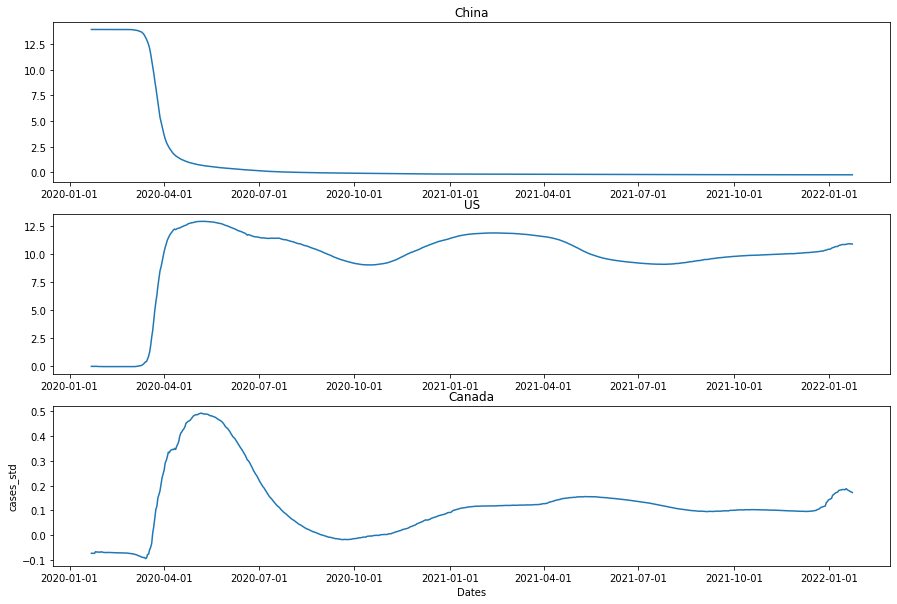

In [ ]:
#3.Run the function in step 1 on the standardized dataset for the US, China, and Canada
plot_fun(cases_std,["China","US","Canada"])

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (733, 733).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`(Bars for each componenet and a line to show cumulative --similar to tutoriual. Limit x-axis if needed to better see the plot). **[0.25]**
4. How many PCs do you need to cover 98% of the dataset's variance? **[0.25]**3 PCs are needed to cover 98% of the datasets's variance
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**The first few PCs have more stablized trends while the last few PCs show more oscilation across the time-series, and the last few PCs seem to be noisy in the graph.

In [ ]:
### YOUR CODE HERE ###
#1.Compute the covariance matrix of the dataframe.
import numpy as np
n, d = cases_std.shape
C=np.dot(cases_std.T,cases_std) / (d-1)
C.shape

(733, 733)

In [ ]:
#2.Define a function get_sorted_eigen(df_cov)
def get_sorted_eigen(df_cov):
  eigenValues, eigenVectors = np.linalg.eigh(df_cov)
  

  # sort eigenVectors in descending order by their eigenValue
  idx = (-eigenValues).argsort()
  eigenValues = eigenValues[idx]
  eigenVectors = eigenVectors[:, idx]

  return eigenValues,eigenVectors

<Figure size 432x288 with 0 Axes>

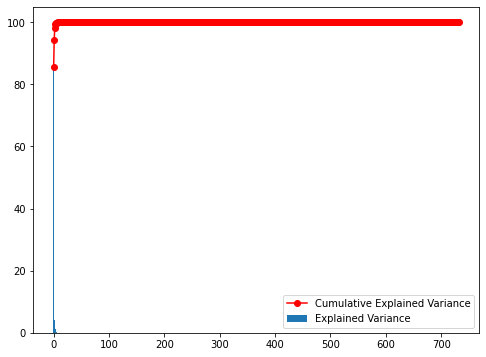

<Figure size 432x288 with 0 Axes>

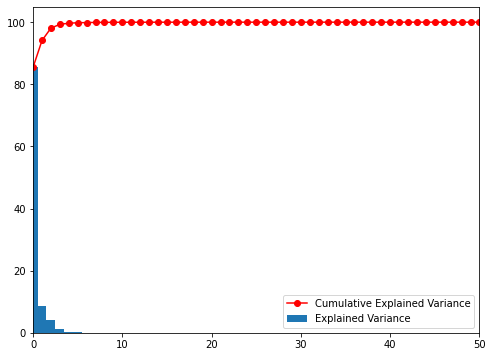

In [ ]:
#3.Show the effectiveness of your principal components in covering the variance of the dataset with a scree plot
from matplotlib.pyplot import figure
eigenValues,eigenVectors=get_sorted_eigen(C)
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
cumExpVar

plt.figure()
figure(figsize=(8,6))
plt.bar(range(733),expVar,width=1,label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

plt.figure()
figure(figsize=(8,6))
plt.bar(range(733),expVar,width=1,label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.xlim(0,50)
plt.show()

In [ ]:
#4.How many PCs do you need to cover 98% of the dataset's variance?
cumExpVar

array([ 85.47590445,  94.10558679,  98.08990311,  99.30079148,
        99.65862424,  99.8113032 ,  99.8744641 ,  99.91875382,
        99.94442571,  99.9666193 ,  99.97667849,  99.98351037,
        99.98804715,  99.9917002 ,  99.99399051,  99.99535537,
        99.9964488 ,  99.99718047,  99.99781163,  99.99825964,
        99.99865153,  99.99893343,  99.99917858,  99.99935209,
        99.99946151,  99.99954626,  99.99962391,  99.99968637,
        99.99973659,  99.99977844,  99.99981033,  99.9998396 ,
        99.99986021,  99.99987813,  99.99989412,  99.99990831,
        99.9999198 ,  99.99992963,  99.99993756,  99.99994412,
        99.99995051,  99.99995659,  99.99996145,  99.9999658 ,
        99.99996971,  99.99997289,  99.99997559,  99.9999778 ,
        99.99997996,  99.99998209,  99.99998389,  99.99998555,
        99.99998703,  99.99998821,  99.99998936,  99.99999034,
        99.99999128,  99.99999211,  99.99999275,  99.99999333,
        99.99999386,  99.99999435,  99.9999948 ,  99.99

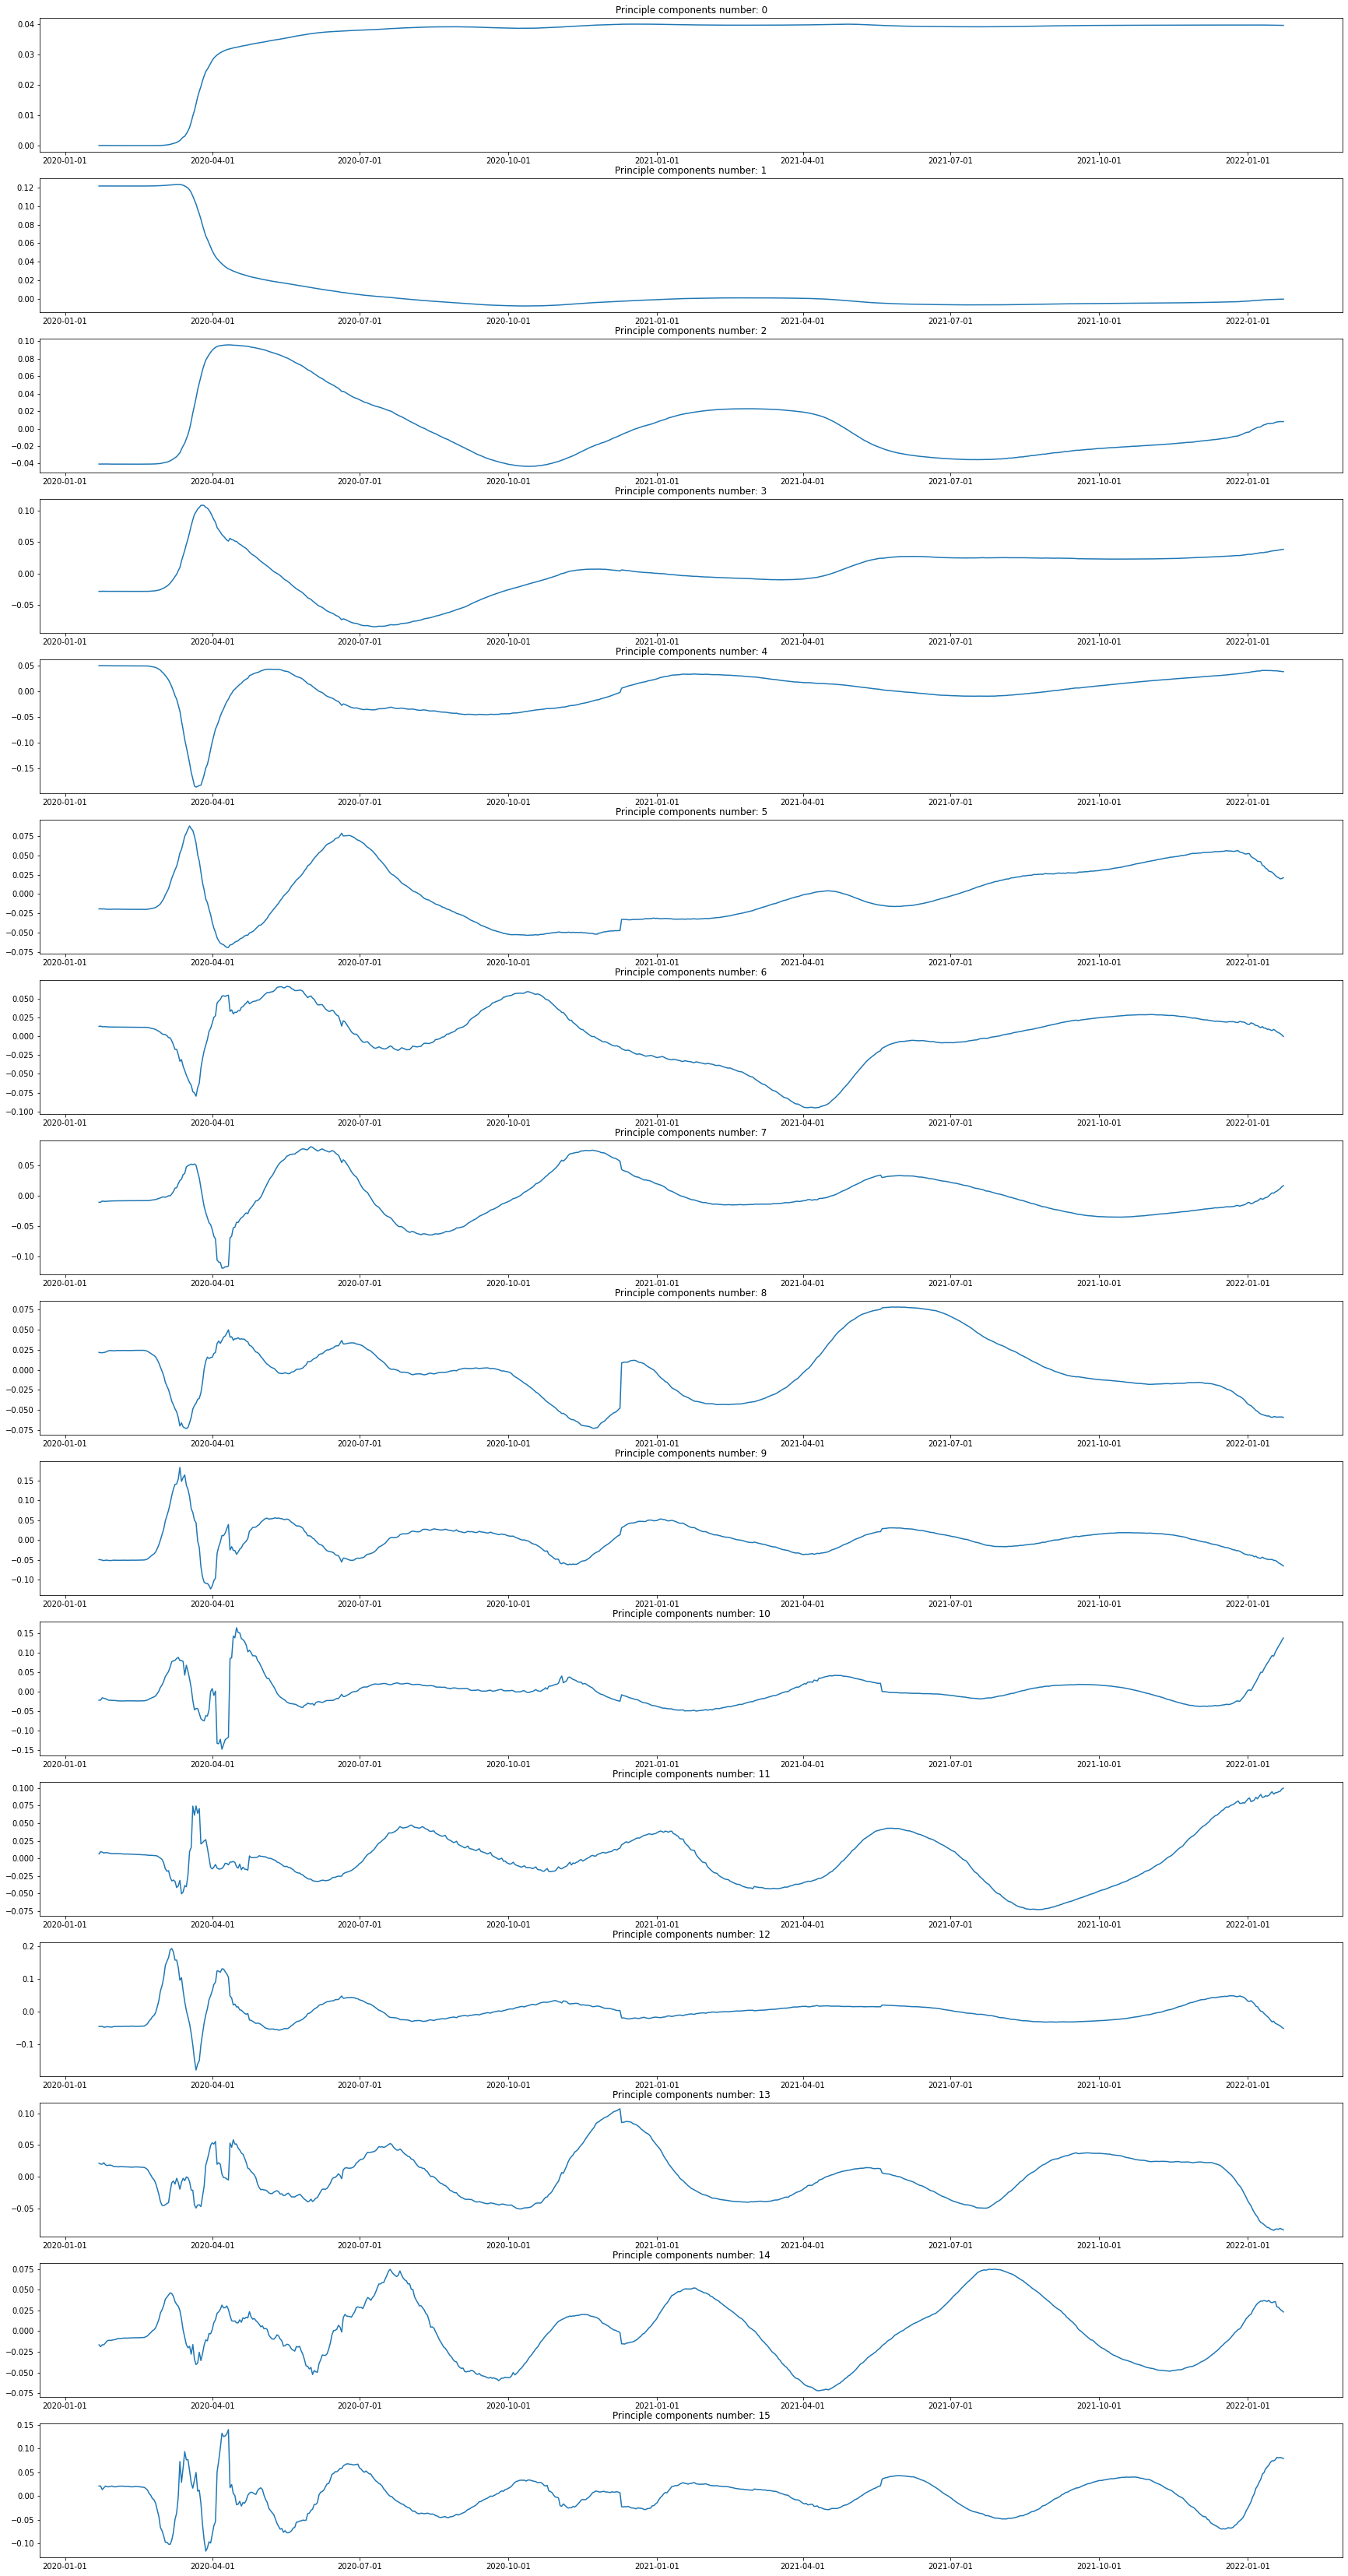

In [ ]:
#5.Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element)
PC_num=16
W=eigenVectors[:,0:PC_num]
Proj_cases=np.dot(cases_std,W)

dates=cases_raw.columns
x = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
figure,axes=plt.subplots(16,figsize=(30,60))

for i in range(0,16):

  axes[i].xaxis_date()
  axes[i].plot(x,W[:,i])
  axes[i].set_title("Principle components number: {}".format(i))
  myFmt = mdates.DateFormatter('%Y-%m-%d')
  axes[i].xaxis.set_major_formatter(myFmt)

# Part 3: Data reconstruction [4 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 100 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[1]**


In [ ]:
#Part3
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import math 
def plot_country_figures(original_df, country_name):

  #get standarzied data
  scaler = preprocessing.StandardScaler().fit(original_df)
  df_std=scaler.transform(original_df)

  #Get Covariance matrix
  n, d = df_std.shape
  C=np.dot(df_std.T,df_std) / (d-1)

  #Get sorted eigenvalues and eigenvectors
  eigenValues,eigenVectors=get_sorted_eigen(C)

  #####First plot
  plt.figure()
  plt.title("Original time-series for {}".format(country_name))
  plt.plot(original_df.columns,original_df.loc[country_name])
  plt.xlabel("Dates")
  plt.ylabel("Cases")

  #####Second plot:The incremental reconstruction of the original (not standardized) time-series for the specified country in a single plot.
  plt.figure()
  plt.title("Incremental reconstruction of the original time-series for {}".format(country_name))
  plt.xlabel("Dates")
  plt.ylabel("Cases")
  #5 curves
  num=[1,2,4,8,16]
  for i in num:
    PC_count=i
    W=eigenVectors[:,0:PC_count]
    proj=np.dot(df_std,W)
    Recon_std=np.dot(proj,W.T)
    Recon=scaler.inverse_transform(Recon_std)
    Recon=pd.DataFrame(Recon)
    Recon.columns=original_df.columns
    Recon.index=original_df.index
    plt.plot(Recon.columns,Recon.loc[country_name],label="Recounstruction With first {} PC".format(PC_count))
  plt.legend()

  #####Third plot:The residual error for your best reconstruction with respect to the original time-series.
  plt.figure()
  plt.title("The residual error for the best reconstruction of the original time-series for {}".format(country_name))
  resi_err=original_df-Recon
  plt.plot(resi_err.columns,resi_err.loc[country_name])
  plt.xlabel("Dates")
  plt.ylabel("Cases")

  #####Fourth Plot:The RMSE of the reconstruction as a function of the number of included components 
  num_component=100
  RMSE=[]
  index=[]
  for i in range(1,num_component+1):
    index.append(i)
    PC_count=i
    W=eigenVectors[:,0:PC_count]
    proj=np.dot(df_std,W)
    Recon_std=np.dot(proj,W.T)
    Recon=scaler.inverse_transform(Recon_std)
    Recon=pd.DataFrame(Recon)
    Recon.columns=original_df.columns
    Recon.index=original_df.index

    y_actual=original_df.loc[country_name]
    y_predicted=Recon.loc[country_name]

    MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
    RMSE.append(math.sqrt(MSE))

  plt.figure()
  plt.title("RMSE of the reconstruction as a function of number of components for {}".format(country_name))
  plt.xlabel("Number of components")
  plt.ylabel("RMSE of Construction")
  plt.plot(index,RMSE)

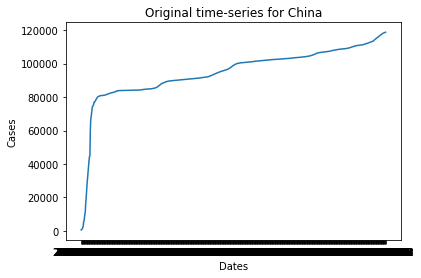

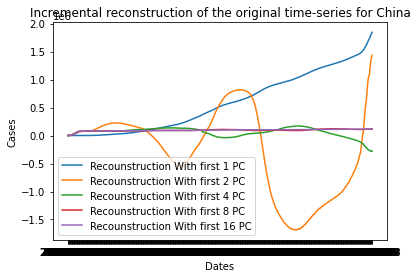

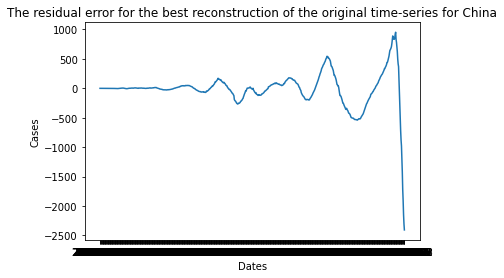

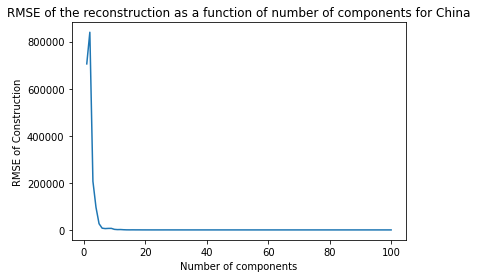

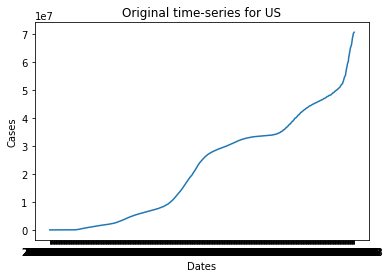

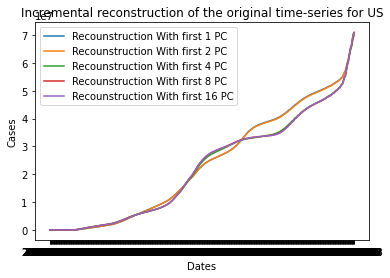

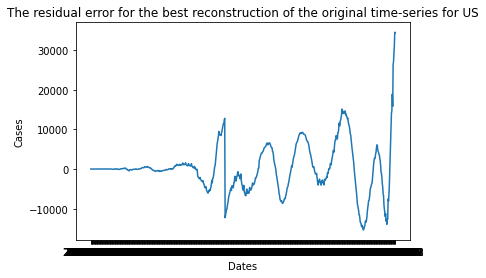

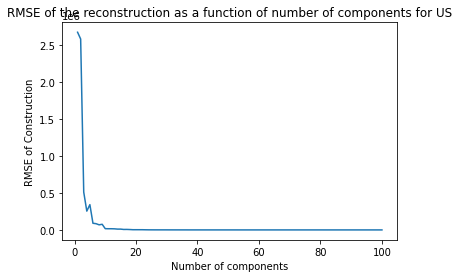

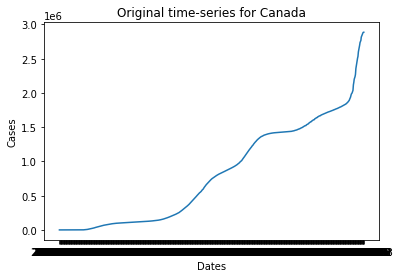

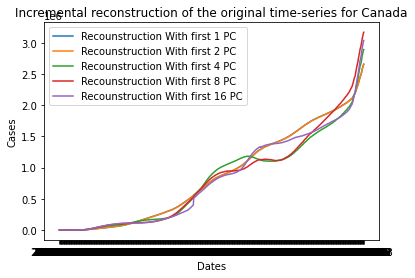

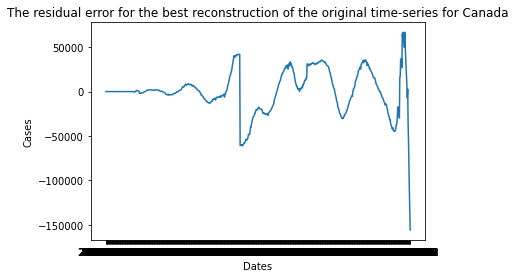

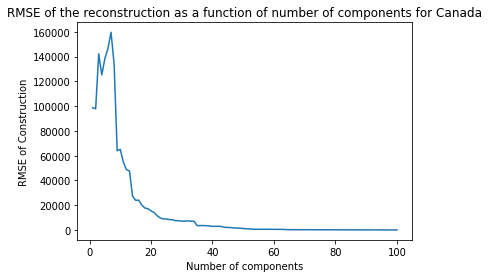

In [ ]:
#US, Canada, and China as inputs
plot_country_figures(cases_raw, "China")
plot_country_figures(cases_raw, "US")
plot_country_figures(cases_raw, "Canada")

# Part 4: SVD [3 Marks]
Modify your function in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.**[1]**
Standardization and covariance computation is not required in this part because SVD does the decomposition directly on the rectangular matrix, and does not need standardization or covariance computation.

Repeat part 3 and compare your PCA and SVD results. **[1]**The plots from PCA and SVD are the same because it is just different ways of getting the same eigenvalues and eigenvectors.



In [ ]:
#Part4
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import math 
def plot_country_figures_SVD(original_df, country_name):

  n, d = original_df.shape
  #Get U,V and singular values using SVD
  U,S,V=np.linalg.svd(original_df)

  #Get eigenvalues and eigenvectors from SVD
  eigenValues=np.square(S)/(d-1)
  eigenVectors=V

  #####First plot
  plt.figure()
  plt.title("Original time-series for {}".format(country_name))
  plt.plot(original_df.columns,original_df.loc[country_name])
  plt.xlabel("Dates")
  plt.ylabel("Cases")

  #####Second plot:The incremental reconstruction of the original (not standardized) time-series for the specified country in a single plot.
  plt.figure()
  plt.title("Incremental reconstruction of the original time-series for {}".format(country_name))
  plt.xlabel("Dates")
  plt.ylabel("Cases")
  #5 curves
  num=[1,2,4,8,16]
  for i in num:
    PC_count=i
    W=eigenVectors[:,0:PC_count]
    proj=np.dot(original_df,W)
    Recon=np.dot(proj,W.T)
    Recon=pd.DataFrame(Recon)
    Recon.columns=original_df.columns
    Recon.index=original_df.index
    plt.plot(Recon.columns,Recon.loc[country_name],label="Recounstruction With first {} PC".format(PC_count))
  plt.legend()

  #####Third plot:The residual error for your best reconstruction with respect to the original time-series.
  plt.figure()
  plt.title("The residual error for the best reconstruction of the original time-series for {}".format(country_name))
  resi_err=original_df-Recon
  plt.plot(resi_err.columns,resi_err.loc[country_name])
  plt.xlabel("Dates")
  plt.ylabel("Cases")

  #####Fourth Plot:The RMSE of the reconstruction as a function of the number of included components 
  num_component=100
  RMSE=[]
  index=[]
  for i in range(1,num_component+1):
    index.append(i)
    PC_count=i
    W=eigenVectors[:,0:PC_count]
    proj=np.dot(original_df,W)
    Recon=np.dot(proj,W.T)
    Recon=pd.DataFrame(Recon)
    Recon.columns=original_df.columns
    Recon.index=original_df.index

    y_actual=original_df.loc[country_name]
    y_predicted=Recon.loc[country_name]

    MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
    RMSE.append(math.sqrt(MSE))

  plt.figure()
  plt.title("RMSE of the reconstruction as a function of number of components for {}".format(country_name))
  plt.xlabel("Number of components")
  plt.ylabel("RMSE of Construction")
  plt.plot(index,RMSE)

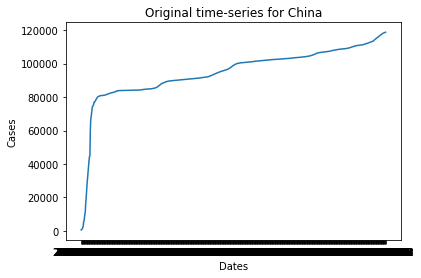

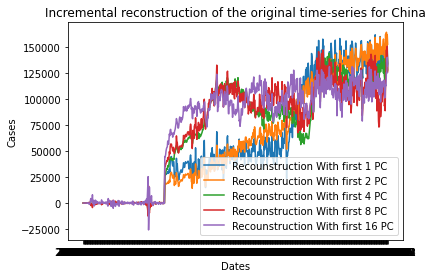

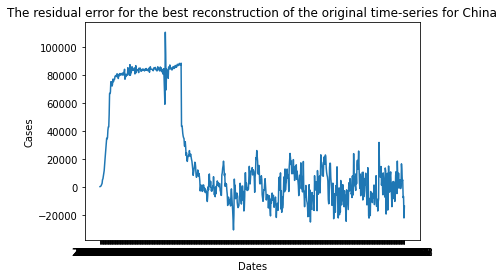

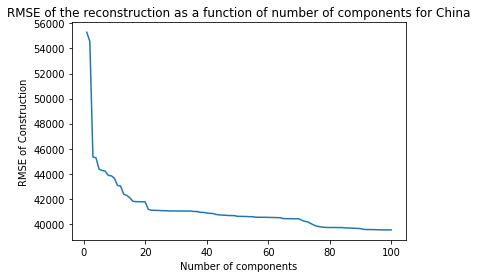

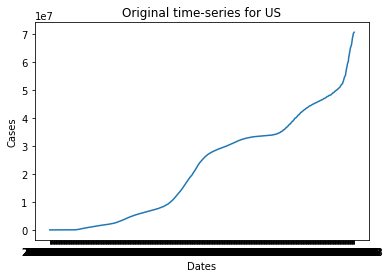

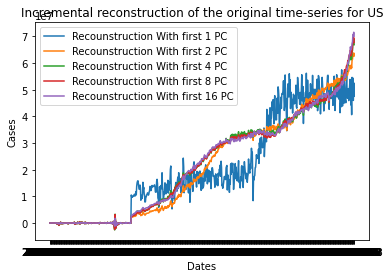

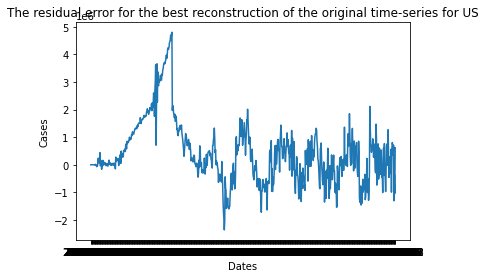

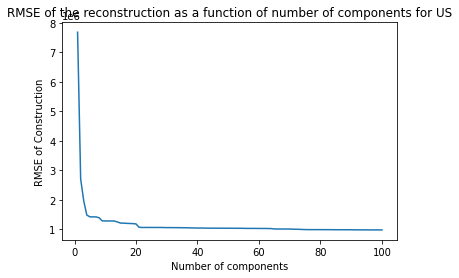

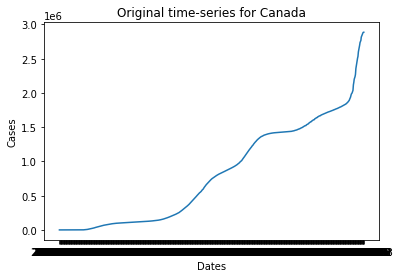

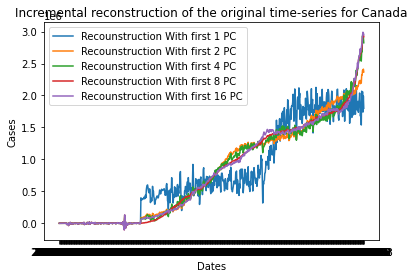

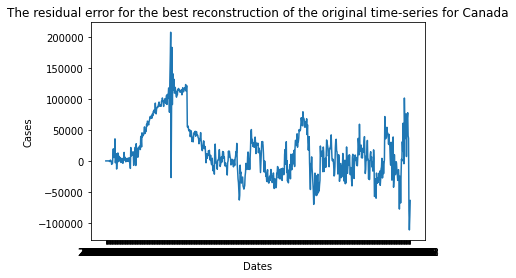

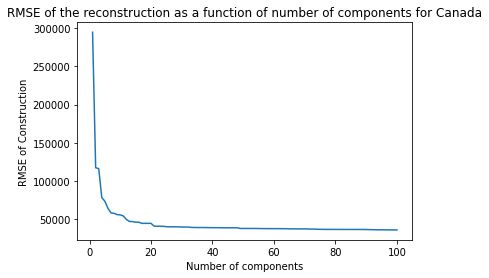

In [ ]:
plot_country_figures_SVD(cases_raw, "China")
plot_country_figures_SVD(cases_raw, "US")
plot_country_figures_SVD(cases_raw, "Canada")

# Part 5: Fashion-MNIST dataset [3 Marks]
Fashion-MNIST is a dataset for clothes. 
Each image in Fashion-MNIST has 28x28 pixels which can be represented in an array with 784 elements. You can take a better look at this dataset in this [link](https://www.openml.org/d/40996) 

In this part, we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Create a new dataset by selecting images from *only* three categories (three distinct labels). 
    * To compress and reconstruct images better with PCA, it is better to choose items that are similar in shape. why? **[0.25]**Because items that are similar in shape will have similar value ranges similar pixels, making the computation of eigenvalues and eigenvectors more consistent.
* Compute Eigenvectors and Eigenvalues using SVD. **[0.25]**
* Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? **[0.5]**Each eigenface has one region with darker color,corresponding to the feature(pixels) that the eigenvector is taking account for.
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as a reconstruction with the first $n$ th principal components. **[0.5]**
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the items. **[0.5]**360 components are required.
* Assume you want to share this dataset with someone else. Instead of directly giving them the whole dataset, you can share the eigenvectors (some of them) and projections with them, and thay can do a dot product to get the reconstructions.  Based on the number of components that you found in the last step, what would be the compression ratio for a dataset with 1000 images? **[1]** The original dataset with 1000 images would have 1000 images and each image has 784 pixels, so the data elements would be 784,000. As determined in last step, 360 eigenvectors are required, now the data set can be summrized by proj:(1000,360) and W(784,360), total elments is 642,240. Therefore, the compression ratio is about 1.22
  * Hint: compare the dataset size with a case where we only use some principal components and projections.

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("Fashion-MNIST")
x = mnist.data[0:1000]
y = mnist.target[0:1000]
target_encoding = {0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

In [ ]:
x.shape

(1000, 784)

Label is: Ankle boot


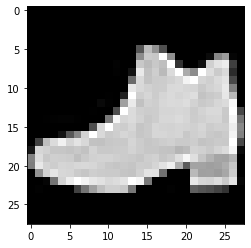

In [ ]:
import matplotlib.pyplot as plt 
plt.gray() 
ind = 15
plt.imshow(x.loc[ind].values.reshape(28,28)) 
print ("Label is:", target_encoding[int(y[ind])])
plt.show() 

In [ ]:
#Create a new dataset picking three catrgories:Sandal,Sneaker,Ankle boot
x_new=x.loc[(y=="5")|(y=="7")|(y=="9")]
x_new

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,64.0,42.0,24.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Compute Eigenvectors and Eigenvalues using SVD
m, n = x_new.shape
#Get U,V and singular values using SVD
U,S,V=np.linalg.svd(x_new)

#Get eigenvalues and eigenvectors from SVD
eigenValues=np.square(S)/(n-1)
eigenVectors=V

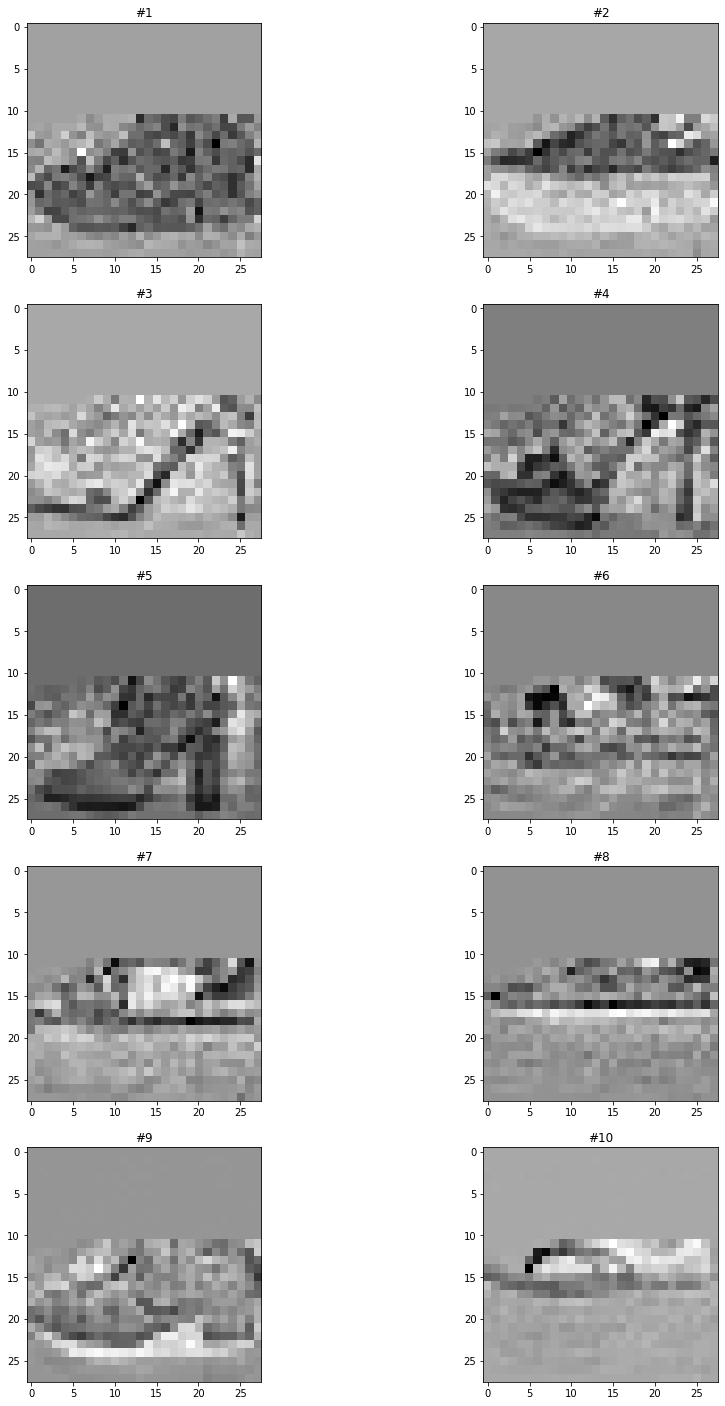

In [ ]:
#Plot the first 10 eigenvectors (as images similar to eigenfaces)
Num=10
eigenValues=eigenValues[0:Num]
eigenVectors=eigenVectors[:,0:Num]
Rows=math.ceil(Num/2)
fig=plt.figure(figsize=(15,Rows*5))
for i in range(0,Num):
  plt.subplot(Rows, 2, i+1)
  plt.imshow(eigenVectors[:, i].reshape(28, 28))
  plt.title('#{}'.format(i+1))

In [ ]:
#Create a function that requires an argument  n  and plots a random image from the dataset, as well as a reconstruction with the first  n  th principal components.
def plot_rand(n,data):
  #Select a random image(row) from the dataset
  selected_image=data.sample()
  #Plot the randomly selected image
  plt.figure()
  plt.imshow(selected_image.values.reshape(28, 28))
  plt.show

  #Reconstruction with first n principal components
  #Compute Eigenvectors and Eigenvalues using SVD
  a, b = data.shape
  #Get U,V and singular values using SVD
  U,S,V=np.linalg.svd(data)

  #Get eigenvalues and eigenvectors from SVD
  eigenValues=np.square(S)/(b-1)
  eigenVectors=V

  #Projection matrix
  W=eigenVectors[:,0:n]

  proj=np.dot(selected_image,W)

  #Reconstruction
  Recon=np.dot(proj,W.T)

  #Plot reconstruction image
  plt.figure()
  plt.imshow(Recon.reshape(28,28))
  plt.show

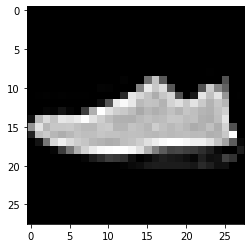

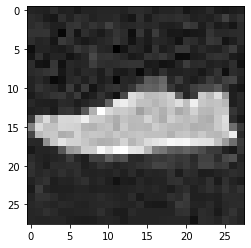

In [ ]:
plot_rand(360,x_new)

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

